# Textual data: classification and exploration.

In [1]:
%load_ext autoreload
%autoreload 2

In [64]:
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
from nltk import tokenize, ngrams
from wordcloud import WordCloud
from string import punctuation

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
movie_review = pd.read_csv("dados/imdb-reviews-pt-br.zip")
movie_review.head()

import warnings
warnings.filterwarnings('ignore')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    movie_review.text_pt,
    movie_review.sentiment,
    random_state = 42
)

In [3]:
regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_train, y_train)
Accuracy = regressao_logistica.score(X_test, y_test)
print(Accuracy)

ValueError: could not convert string to float: 'Embora o filme tenha sido apenas assim, o closed caption foi de longe o melhor que eu já vi! Na maioria das vezes, a ortografia é terrível e a legenda está fora de sincronia. Eu uso o closed captioning mesmo que eu possa ouvir bem, mas acho que muitos atores resmungam. Também muitas vezes a trilha sonora substitui o diálogo. Obrigado!'

In [ ]:
print("Negativa \n")
print(movie_review.text_pt[189])

In [4]:
print("Positivo \n")
print(movie_review.text_pt[49002])

Positivo 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [5]:
print(movie_review.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [6]:
movie_review.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
classification = movie_review["sentiment"].replace(["neg", "pos"], [0,1])

In [5]:
movie_review["classification"] = classification

In [6]:
movie_review.head()

,id,text_en,text_pt,sentiment,classification
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [7]:
movie_review.tail()

,id,text_en,text_pt,sentiment,classification
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


# Bag of words: creating representations of human language.

In [8]:
text = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(text)

In [9]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [10]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [11]:
sparse_matrix = pd.DataFrame.sparse.from_spmatrix(
    bag_of_words,
    columns=vetorizar.get_feature_names_out()
)

In [12]:
sparse_matrix

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [14]:
vectorize = CountVectorizer(lowercase=False, max_features=50) # Appear just the words with the more frequency in the textual corpus
bag_of_words = vectorize.fit_transform(movie_review.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [29]:
def classify_text(text, column_text, column_classify):
    vectorize = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorize.fit_transform(text[column_text])
    
    X_train, X_test, y_train, y_test = train_test_split(
        bag_of_words,
        text[column_classify],
        random_state = 42
    )

    logistic_regression = LogisticRegression(penalty='l1', solver = 'saga')
    logistic_regression.fit(X_train, y_train)
    
    return logistic_regression.score(X_test, y_test)

In [29]:
print(classify_text(movie_review, "text_pt", "classification"))

0.6553174282248282


# Creating a WordCloud

In [14]:
all_words = ' '.join([text for text in movie_review.text_pt])

word_cloud = WordCloud(
    width= 800,
    height= 500,
    max_font_size = 110,
    collocations = False # for not consider bigrams
).generate(all_words)

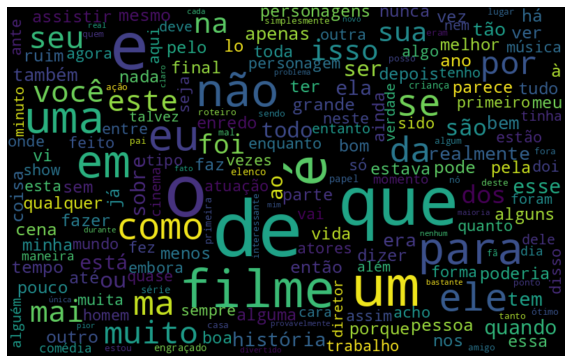

In [33]:
plt.figure(figsize=(10,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Creating function to plot the clouds

In [34]:
def cloud_words_neg(text, column_text):
    text_negative = text.query("sentiment == 'neg'")
    all_words = ' '.join([text for text in text_negative[column_text]])

    cloud_words = WordCloud(
        width= 800, height= 500,
        max_font_size = 110,
        collocations = False
    ).generate(all_words)
    
    plt.figure(figsize=(10,7))
    plt.imshow(cloud_words, interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [35]:
def cloud_words_pos(text, column_text):
    text_positive = text.query("sentiment == 'pos'")
    all_words = ' '.join([text for text in text_positive[column_text]])

    cloud_words = WordCloud(
        width= 800, height= 500,
        max_font_size = 110,
        collocations = False
    ).generate(all_words)
    
    plt.figure(figsize=(10,7))
    plt.imshow(cloud_words, interpolation='bilinear')
    plt.axis("off")
    plt.show()


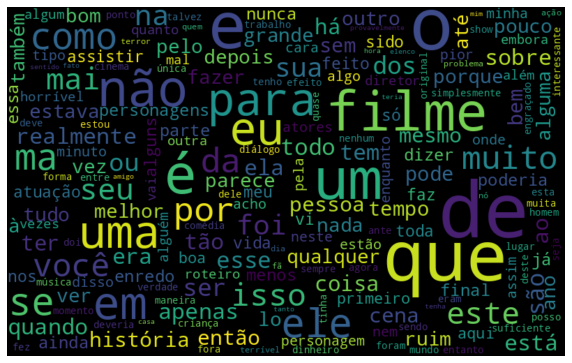

In [39]:
cloud_words_neg(movie_review, "text_pt")

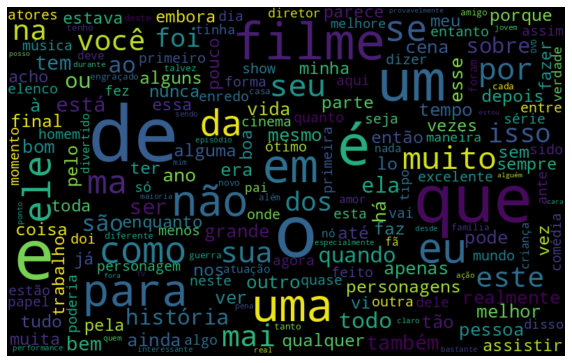

In [40]:
cloud_words_pos(movie_review, "text_pt")

# Tokenization and the NLTK library.

In [ ]:
# install all packages
nltk.download('all')

In [11]:
phrase = ["um filme bom", "um filme ruim"]
frequency = nltk.FreqDist(phrase)
frequency

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [13]:
phrase = "Bem vindo ao mundo do PLN!"

token_space = tokenize.WhitespaceTokenizer() # with spaces
token_phrase = token_space.tokenize(phrase)
print(token_phrase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [18]:
token_phrase = token_space.tokenize(all_words)
frequency = nltk.FreqDist(token_phrase)
df_frequency = pd.DataFrame({
    "Word": list(frequency.keys()),
    "Frequency": list(frequency.values())
})

In [19]:
df_frequency.nlargest(columns = "Frequency", n = 10)

,Word,Frequency
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


# A new view and stop words.

Creating function to plot the pareto graphic

In [15]:
def pareto(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_space = tokenize.WhitespaceTokenizer()
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)

    df_frequency = pd.DataFrame({
        "Words": list(frequency.keys()),
        "Frequency": list(frequency.values())
    })
    df_frequency = df_frequency.nlargest(columns="Frequency", n=quantity)
    
    total = df_frequency['Frequency'].sum()
    df_frequency['Percentage'] = df_frequency['Frequency'].cumsum() / total * 100
    
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=df_frequency, x='Words', y='Frequency', color='gray')
    ax2 = ax.twinx()
    sns.lineplot(data=df_frequency, x='Words', y='Percentage', color='red', sort=False, ax=ax2)
    plt.show()

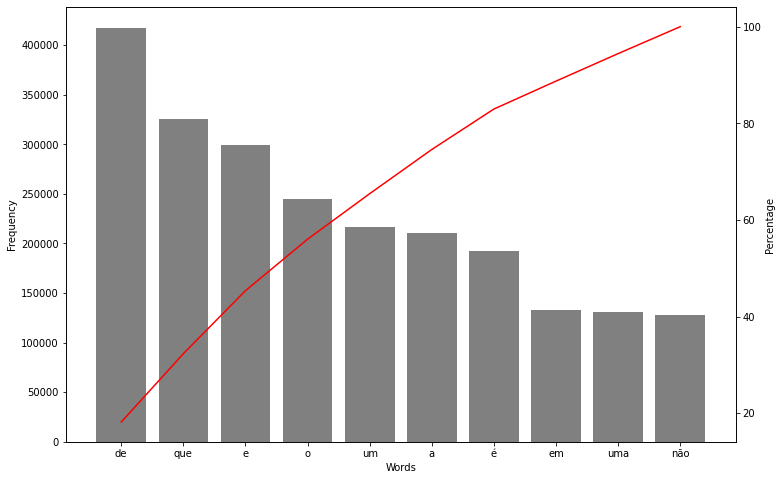

In [17]:
pareto(movie_review, "text_pt", 10)

$Stop$ words are any word in a stop list which are filtered out before or after processing of natural language data. There is no single universal list of stop words used by all natural language processing tools, nor any agreed upon rules for identifying stop words, and indeed not all tools even use such a list.

In [6]:
irrelevant_words = nltk.corpus.stopwords.words("portuguese")

token_space = tokenize.WhitespaceTokenizer()
processed_phrase = list()

for opinion in movie_review.text_pt:
    new_phrase = list()
    words_text = token_space.tokenize(opinion)
    for word in words_text:
        if word not in irrelevant_words:
            new_phrase.append(word)
    processed_phrase.append(' '.join(new_phrase))
    
movie_review["processing_1"] = processed_phrase

In [7]:
movie_review.head()

,id,text_en,text_pt,sentiment,classification,processing_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [21]:
classify_text(movie_review, "processing_1", "classification")

0.661140315406389

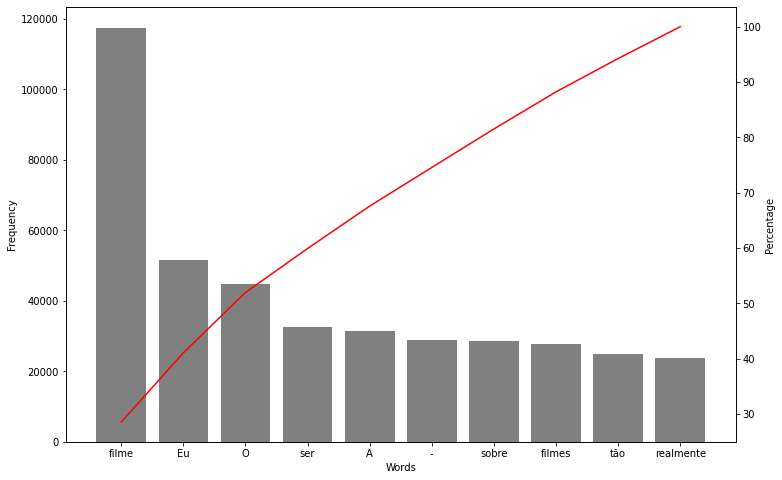

In [22]:
pareto(movie_review, "processing_1", 10)

# Optimizing analytics: without punctuation

In [8]:
phrase = "Hello World!"
token_punctuation = tokenize.WordPunctTokenizer()
token_phase = token_punctuation.tokenize(phrase)

print(token_phase)

['Hello', 'World', '!']


In [9]:
from string import punctuation
irrelevant_words = nltk.corpus.stopwords.words("portuguese")
token_punctuation = tokenize.WordPunctTokenizer()

# take the list of punctuation
punctuation_list = list()
for symbols in punctuation:
    punctuation_list.append(symbols)

# Take the punctuation and irrelevant words
punctuation_stopwords = punctuation_list + irrelevant_words

phrase_processed = list()
for opinion in movie_review["processing_1"]:
    new_phrase = list()
    words_text = token_punctuation.tokenize(opinion)
    for word in words_text:
        if word not in punctuation_stopwords:
            new_phrase.append(word)
    phrase_processed.append(' '.join(new_phrase))
    
movie_review["processing_2"] = phrase_processed

In [10]:
movie_review.head()

,id,text_en,text_pt,sentiment,classification,processing_1,processing_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [12]:
movie_review["processing_1"][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [13]:
movie_review["processing_2"][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece estar vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

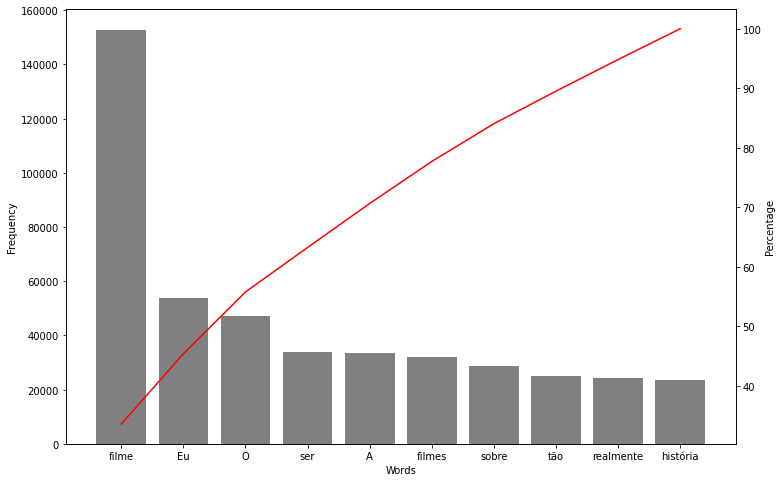

In [16]:
pareto(movie_review, "processing_2", 10)

Taking off the accents

In [18]:
import unidecode

accents = "ótimo péssimo não é tão"

test = unidecode.unidecode(accents)
print(test)

otimo pessimo nao e tao


In [19]:
# Taking off the accents
without_accents = [unidecode.unidecode(text) for text in movie_review["processing_2"]]

In [20]:
without_accents[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [21]:
stopwords_without_accents = [unidecode.unidecode(text) for text in punctuation_stopwords]

In [22]:
stopwords_without_accents

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'de',
 'a',
 'o',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'nao',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'a',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'ja',
 'eu',
 'tambem',
 'so',
 'pelo',
 'pela',
 'ate',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voce',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'as',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nos',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voces',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 

In [27]:
token_punctuation = tokenize.WordPunctTokenizer()
movie_review["processing_3"] = without_accents

phrase_processed = list()
for opinion in movie_review["processing_3"]:
    new_phrase = list()
    words_text = token_punctuation.tokenize(opinion)
    for word in words_text:
        if word not in stopwords_without_accents:
            new_phrase.append(word)
    phrase_processed.append(' '.join(new_phrase))
    
movie_review["processing_3"] = phrase_processed

In [28]:
movie_review.head()

,id,text_en,text_pt,sentiment,classification,processing_1,processing_2,processing_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [32]:
accuracy_train3 = classify_text(movie_review, "processing_3", "classification")
print(accuracy_train3)

0.6806308127780024


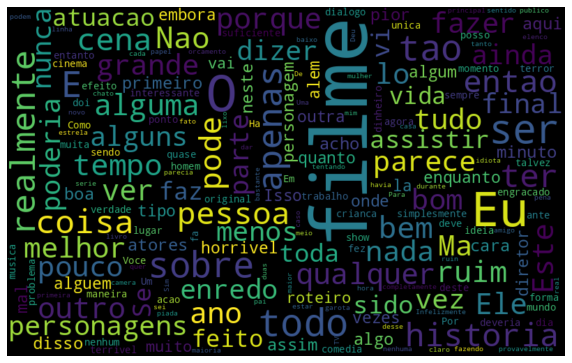

In [36]:
cloud_words_neg(movie_review, "processing_3")

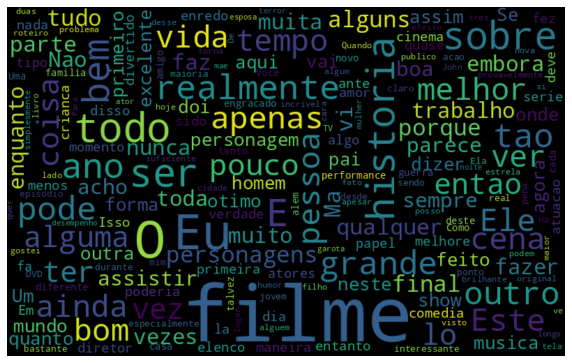

In [37]:
cloud_words_pos(movie_review, "processing_3")

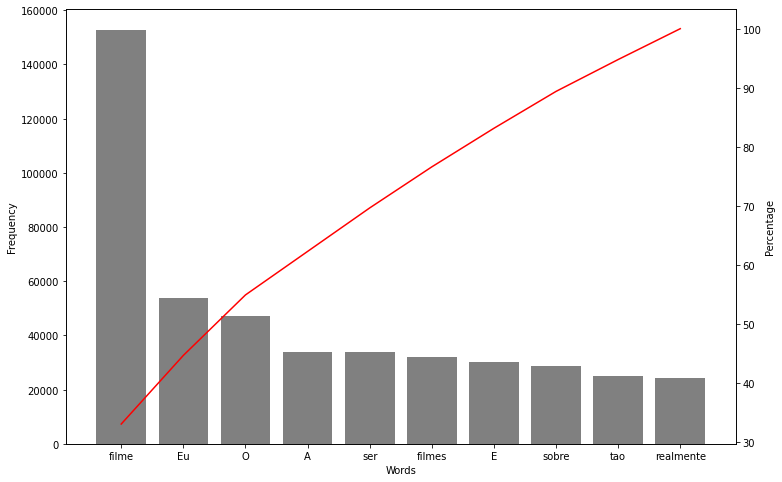

In [38]:
pareto(movie_review, "processing_3", 10)

# Put the words in lower case and take off the stopwords

In [39]:
phrase = "O Thiago é o novo instrutor da Alura"
print(phrase.lower())

o thiago é o novo instrutor da alura


In [40]:
token_punctuation = tokenize.WordPunctTokenizer()

phrase_preprocessed = list()
for opinion in movie_review["processing_3"]:
    new_phrase = list()
    opinion = opinion.lower()
    words_text = token_punctuation.tokenize(opinion)
    for word in words_text:
        if word not in stopwords_without_accents:
            new_phrase.append(word)
    phrase_preprocessed.append(' '.join(new_phrase))
    
movie_review["processing_4"] = phrase_preprocessed

In [41]:
movie_review["text_pt"][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [42]:
movie_review["processing_4"][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [43]:
accuracy_train4 = classify_text(movie_review, "processing_4", "classification")
print(accuracy_train4)

0.6879094217549535


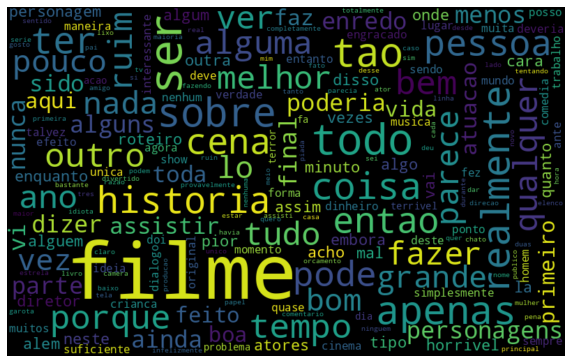

In [44]:
cloud_words_neg(movie_review, "processing_4")

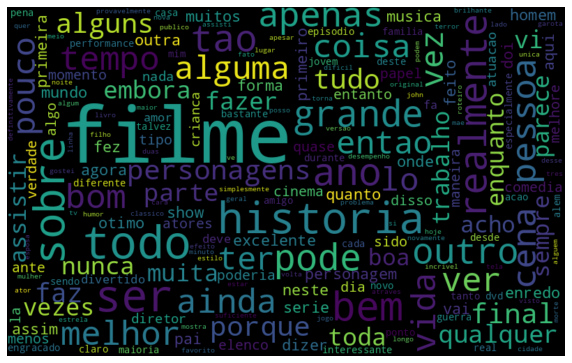

In [45]:
cloud_words_pos(movie_review, "processing_4")

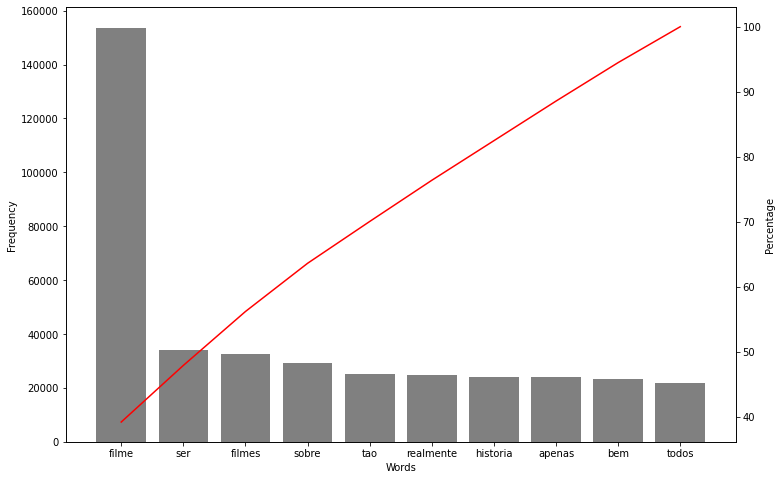

In [46]:
pareto(movie_review, "processing_4", 10)

# Reducing inflected words to their word stem

$Stemming$ is the process of reducing inflected words to their word stem, base or root form—generally a written word form.

Read more about [RSLP](http://www.inf.ufrgs.br/~viviane/rslp/index.htm).

For english <code>from nltk.stem import PorterStemmer<code>

In [47]:
stemmer = nltk.RSLPStemmer() # for portuguese
stemmer.stem("correria")

'corr'

In [51]:
token_punctuation = tokenize.WordPunctTokenizer()

phrase_preprocessed = list()
for opinion in movie_review["processing_4"]:
    new_phrase = list()
    words_text = token_punctuation.tokenize(opinion)
    for word in words_text:
        if word not in stopwords_without_accents: # I've already done this in the previous step. You could withdraw this.
            new_phrase.append(stemmer.stem(word))
    phrase_preprocessed.append(' '.join(new_phrase))
    
movie_review["processing_5"] = phrase_preprocessed

In [52]:
accuracy_train5 = classify_text(movie_review, "processing_5", "classification")
print(accuracy_train5)

0.6951071572988273


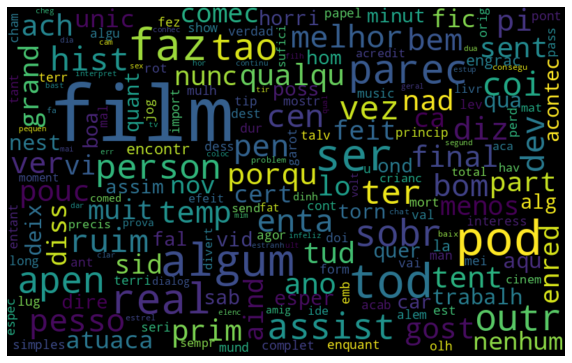

In [53]:
cloud_words_neg(movie_review, "processing_5")

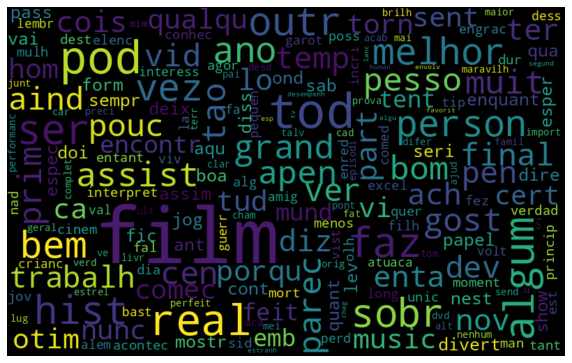

In [54]:
cloud_words_pos(movie_review, "processing_5")

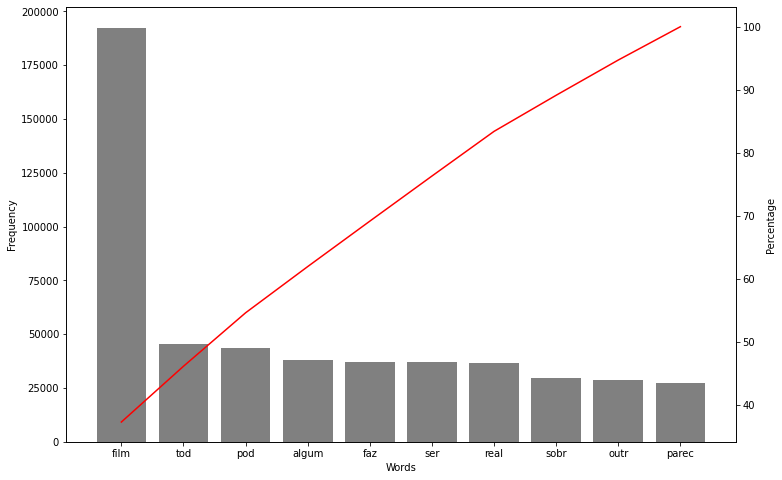

In [55]:
pareto(movie_review, "processing_5", 10)

# TF-IDF e Ngrams: Advanced techniques

$TF-IDF$ (term frequency-inverse document frequency) **is a statistical measure that evaluates how relevant a word is to a document in a collection of documents**. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

Read [more](https://towardsdatascience.com/tf-term-frequency-idf-inverse-document-frequency-from-scratch-in-python-6c2b61b78558).

In [57]:
phrases = ["Assiti um filme ótimo", "Assiti um filme péssimo"]

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

characteristics = tfidf.fit_transform(phrases)
# Other way to do a sparse matrix
pd.DataFrame(
    characteristics.todense(),
    columns=tfidf.get_feature_names()
)

,Assiti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [61]:
tfidf_raw = tfidf.fit_transform(movie_review["text_pt"])
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_raw,
    movie_review["classification"],
    random_state=42
)

logistic_regression = LogisticRegression(penalty='l1', solver = 'saga')
logistic_regression.fit(X_train, y_train)

accuracy_tfidf_raw = logistic_regression.score(X_test, y_test)
print(accuracy_tfidf_raw)

0.6603315810756166


In [62]:
tfidf_preprocessed = tfidf.fit_transform(movie_review["processing_5"])
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_preprocessed,
    movie_review["classification"],
    random_state = 42
)
logistic_regression.fit(X_train, y_train)
accuracy_tfidf_preprocessed = logistic_regression.score(X_test, y_test)
print(accuracy_tfidf_preprocessed)

0.6989890820865345


In [63]:
print(accuracy_train5)

0.6951071572988273


# Ngrams

$N-gram$ (sometimes also called Q-gram) is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus. When the items are words, n-grams may also be called shingles.

In [65]:
token_space = tokenize.WhitespaceTokenizer()

phrase = "Assisti um ótimo filme."
separate_phrases = token_space.tokenize(phrase)
evens = ngrams(separate_phrases, 2) # bi-gram in this case
list(evens)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [66]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2)) # isolated words and bi-gram in my vector
vetor_tfidf = tfidf.fit_transform(movie_review["processing_5"]) # I did not limit to show the n-grams. It will appear more
X_train, X_test, y_train, y_test = train_test_split(
    vetor_tfidf,
    movie_review["classification"],
    random_state = 42)

logistic_regression.fit(X_train, y_train)
accuracy_tfidf_ngrams = logistic_regression.score(X_test, y_test)
print(accuracy_tfidf_ngrams)

0.8734330772341286


It is good to test the vector size and the size of the n-grams. Find a good trade-off

[Interpreting Coefficients in Linear and Logistic Regression](https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1).

See bellow that did not appear any n-grams. So it was good to not limit the size of the vector

In [67]:
weights = pd.DataFrame(
    logistic_regression.coef_[0].T,
    index = tfidf.get_feature_names()
)

weights.nlargest(50,0)

,0
excel,25.867021
otim,23.816966
perfeit,21.559530
maravilhos,18.286104
10 10,16.951531
favorit,16.927931
maravilh,16.476715
hilari,16.026202
alt recomend,15.408089
incri,15.032415


In [68]:
weights.nsmallest(10,0)

,0
horri,-30.435112
ruim,-27.474277
chat,-23.619345
pi film,-23.509643
terri,-23.382838
decepca,-22.721082
pi,-21.590738
desperdici,-20.887034
perd temp,-18.708871
ridicul,-17.487684


The main characteristic of the TF-IDF is that it is proportional to the frequency of the word in the text and balanced by the frequency in the corpus, or, words that are repeated a lot throughout the corpus tend to have punctuation. Although Ngram is one that can optimize your result so be careful, since using our word bag method considerably increases the size, which also causes the computational cost to increase.